## CO2 Emissions
CO2 emissions have significant environmental impacts. The accumulation of CO2 in the atmosphere contributes to the greenhouse effect, trapping heat and causing global warming. This leads to various adverse effects, including rising global temperatures, sea-level rise, changes in weather patterns, and ecosystem disruptions. The long-term consequences of climate change can negatively impact human health, agriculture, biodiversity, and socio-economic systems.

## Objectives
The objective of this project was to carry out an exploratory analysis of the data to understand how the variables behave and relate to each other, as well as to create a Random forest model capable of predicting CO2 emissions based on vehicle data. The obtained model was able to explain 97% of the data variation.

## Exploratory Data Analysis

### Imports and Reading Data

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt


In [35]:
df = pd.read_csv('CO2 Emissions.csv')

In [36]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [37]:
df.tail()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


### Data Understanding

In [38]:
df.shape

(7385, 12)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [40]:
df.nunique().sort_values()

Fuel Type                              5
Cylinders                              8
Vehicle Class                         16
Transmission                          27
Make                                  42
Engine Size(L)                        51
Fuel Consumption Comb (mpg)           54
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption City (L/100 km)     211
CO2 Emissions(g/km)                  331
Model                               2053
dtype: int64

In [41]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.16,1.35,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.62,1.83,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.56,3.50,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.04,2.22,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.98,2.89,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.48,7.23,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.58,58.51,96.0,208.0,246.0,288.0,522.0


### Feature Understanding

#### Univariate analysis

<Axes: title={'center': 'CO2 Emissions(g/km)'}, xlabel='CO2 Emissions(g/km)', ylabel='y'>

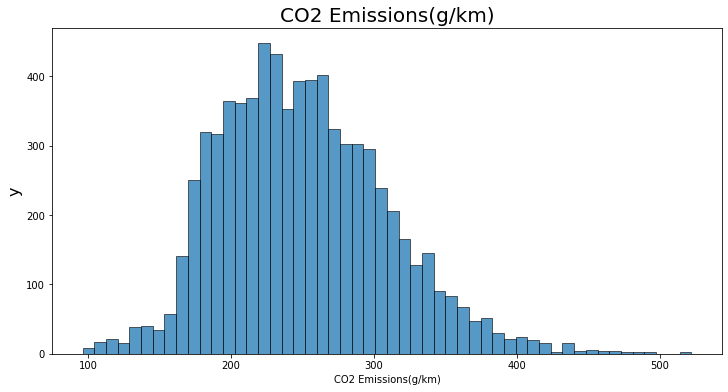

In [42]:
ax = sns.histplot(df['CO2 Emissions(g/km)'])
ax.figure.set_size_inches(12, 6)
ax.set_title('CO2 Emissions(g/km)', fontsize=20)
ax.set_ylabel('y', fontsize=16)
ax

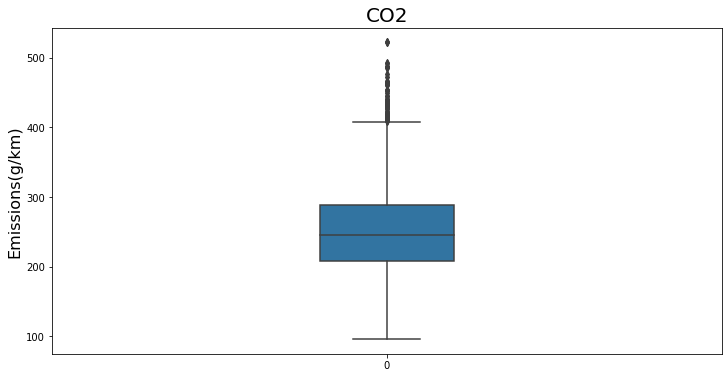

In [43]:
ax = sns.boxplot(data=df['CO2 Emissions(g/km)'], orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('CO2', fontsize=20)
ax.set_ylabel('Emissions(g/km)', fontsize=16)
ax
plt.show()

### Feature Relationships

####  Categorical versus numerical

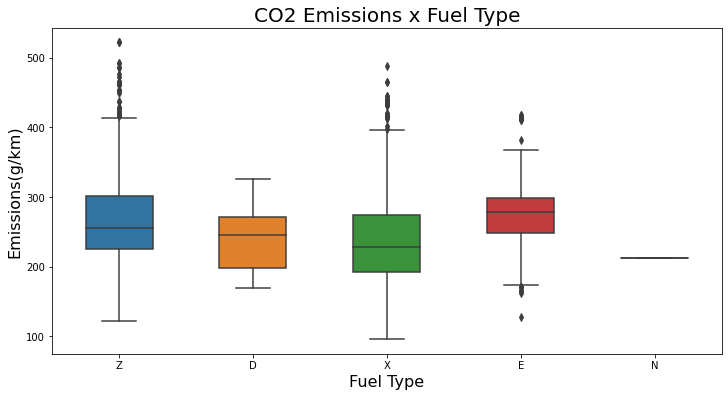

In [44]:
ax = sns.boxplot(y='CO2 Emissions(g/km)', x='Fuel Type', data=df, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('CO2 Emissions x Fuel Type', fontsize=20)
ax.set_ylabel('Emissions(g/km)', fontsize=16)
ax.set_xlabel('Fuel Type', fontsize=16)
ax
plt.show()

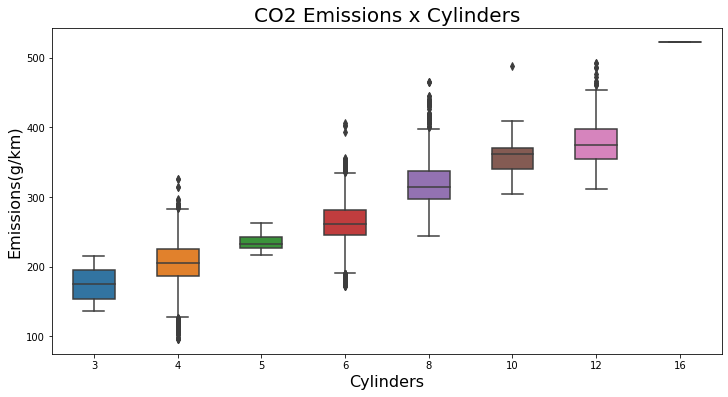

In [45]:
ax = sns.boxplot(y='CO2 Emissions(g/km)', x='Cylinders', data=df, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('CO2 Emissions x Cylinders', fontsize=20)
ax.set_ylabel('Emissions(g/km)', fontsize=16)
ax.set_xlabel('Cylinders', fontsize=16)
ax
plt.show()

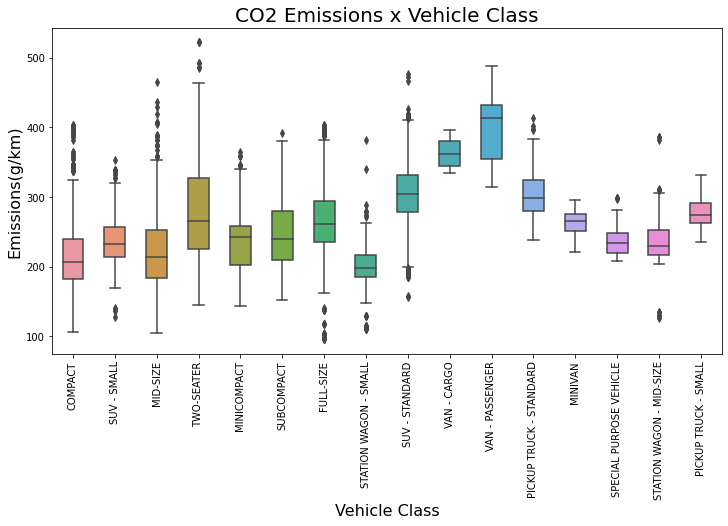

In [46]:
ax = sns.boxplot(y='CO2 Emissions(g/km)', x='Vehicle Class', data=df, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('CO2 Emissions x Vehicle Class', fontsize=20)
ax.set_ylabel('Emissions(g/km)', fontsize=16)
ax.set_xlabel('Vehicle Class', fontsize=16)
plt.xticks(rotation='vertical')
ax
plt.show()

####  Numerical versus numerical

- Scatterplot
- Heatmap Correlation

C:\Users\55169\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


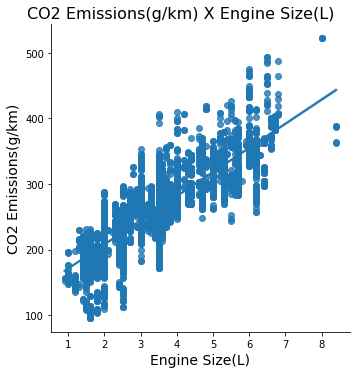

In [47]:
ax = sns.lmplot(x="Engine Size(L)", y="CO2 Emissions(g/km)", data=df)
ax.fig.suptitle('CO2 Emissions(g/km) X Engine Size(L)', fontsize=16, y=1.02)
ax.set_xlabels("Engine Size(L)", fontsize=14)
ax.set_ylabels("CO2 Emissions(g/km)", fontsize=14)
ax
plt.show()

C:\Users\55169\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


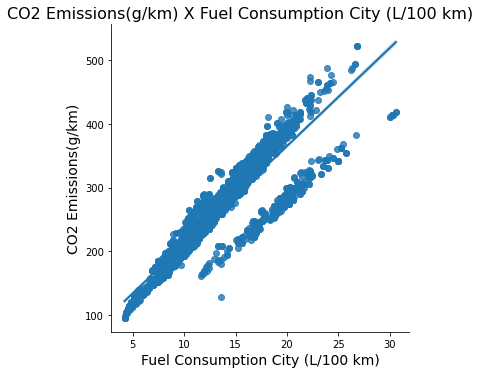

In [48]:
ax = sns.lmplot(x="Fuel Consumption City (L/100 km)", y="CO2 Emissions(g/km)", data=df)
ax.fig.suptitle('CO2 Emissions(g/km) X Fuel Consumption City (L/100 km)', fontsize=16, y=1.02)
ax.set_xlabels("Fuel Consumption City (L/100 km)", fontsize=14)
ax.set_ylabels("CO2 Emissions(g/km)", fontsize=14)
ax
plt.show()

C:\Users\55169\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


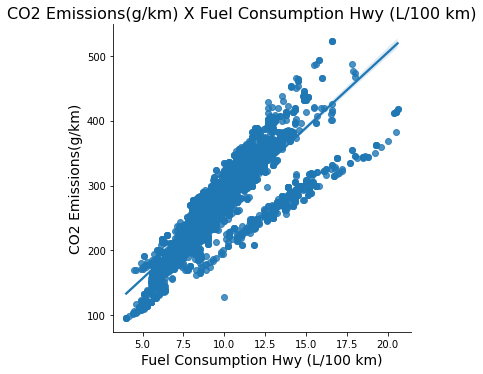

In [49]:
ax = sns.lmplot(x="Fuel Consumption Hwy (L/100 km)", y="CO2 Emissions(g/km)", data=df)
ax.fig.suptitle('CO2 Emissions(g/km) X Fuel Consumption Hwy (L/100 km)', fontsize=16, y=1.02)
ax.set_xlabels("Fuel Consumption Hwy (L/100 km)", fontsize=14)
ax.set_ylabels("CO2 Emissions(g/km)", fontsize=14)
ax
plt.show()

C:\Users\55169\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


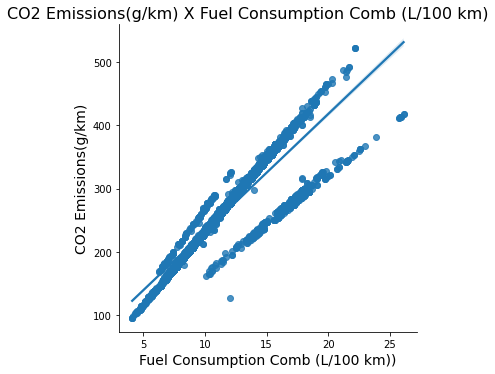

In [50]:
ax = sns.lmplot(x="Fuel Consumption Comb (L/100 km)", y="CO2 Emissions(g/km)", data=df)
ax.fig.suptitle('CO2 Emissions(g/km) X Fuel Consumption Comb (L/100 km)', fontsize=16, y=1.02)
ax.set_xlabels("Fuel Consumption Comb (L/100 km))", fontsize=14)
ax.set_ylabels("CO2 Emissions(g/km)", fontsize=14)
ax
plt.show()

C:\Users\55169\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


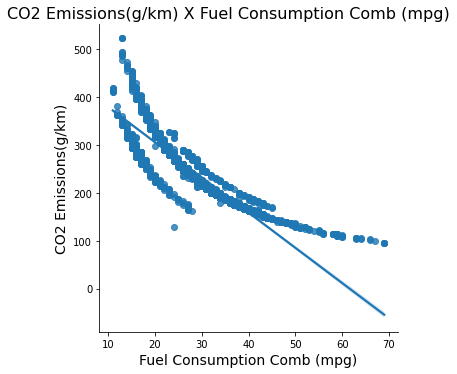

In [51]:
ax = sns.lmplot(x="Fuel Consumption Comb (mpg)", y="CO2 Emissions(g/km)", data=df)
ax.fig.suptitle('CO2 Emissions(g/km) X Fuel Consumption Comb (mpg)', fontsize=16, y=1.02)
ax.set_xlabels("Fuel Consumption Comb (mpg)", fontsize=14)
ax.set_ylabels("CO2 Emissions(g/km)", fontsize=14)
ax
plt.show()

In [52]:
df.corr().round(4)

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.0000,0.9277,0.8314,0.7615,0.8171,-0.7579,0.8511
Cylinders,0.9277,1.0000,0.8007,0.7153,0.7805,-0.7193,0.8326
Fuel Consumption City (L/100 km),0.8314,0.8007,1.0000,0.9482,0.9938,-0.9271,0.9196
Fuel Consumption Hwy (L/100 km),0.7615,0.7153,0.9482,1.0000,0.9773,-0.8906,0.8835
Fuel Consumption Comb (L/100 km),0.8171,0.7805,0.9938,0.9773,1.0000,-0.9256,0.9181
Fuel Consumption Comb (mpg),-0.7579,-0.7193,-0.9271,-0.8906,-0.9256,1.0000,-0.9074
CO2 Emissions(g/km),0.8511,0.8326,0.9196,0.8835,0.9181,-0.9074,1.0000


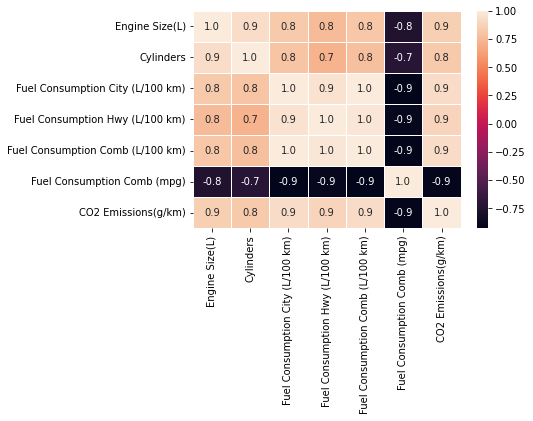

In [53]:
correlacao = df.corr()
plot = sns.heatmap(correlacao, annot = True, fmt=".1f", linewidths=.6)
plot
plt.show()

### Random Forest

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
y = df['CO2 Emissions(g/km)']

In [56]:
X = df[['Engine Size(L)', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']]

In [57]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size= 0.7, random_state = 0)

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
preds = forest_model.predict(X_valid)
print(mean_absolute_error(y_valid, preds))

3.1130476874675845


In [59]:
from sklearn.metrics import r2_score



In [61]:
r2_score(y_valid, preds).round(4)

0.9759